# Classical Statistical Tests: Hypothesis Testing

## 1. Introduction

##### Hypothesis
> a statement about a population parameter

Examples:
* is the mean value consistent with zero?
* are the data normally distributed?

##### Null ($H_0$) hypothesis and alternative ($H_1$) hypothesis
> two complementary hypotheses - a hypothesis test points at one of them

Example:
* $H_0$: mean value $\mu = 0$
* $H_1$: $\mu \neq 0$

##### Hypothesis testing
> to decide whether a hypothesis is *true* or *not*, based on empirical data

##### Test statistic
> quantity which is constrained for a given hypothesis test and confidence level


### 1.1. Null and alternative hypotheses
Usually, we use *null* to denote the simplest hypothesis. E.g. when testing if the there is a peak in a signal, the null hypothesis is:

> $H_0$: there is no peak - the data are background noise

The alternative hypothesis is the one for which we require overwhelming evidence. For example, when testing the General Relativity through Gravitational Wave observations, then

> $H_0$: the data is consistent with GR

> $H_1$: the data is not consistent with GR


### 1.2. Type I and II errors

In statistics, there is always a probability of a spurious result - we must be careful when stating results. Therefore, the two outcomes are commonly phrased as:

* **we do not reject $H_0$** instead of *we accept $H_0$*
* **we reject $H_0$** instead of *we accept $H_1$*

There are two types of wrong conclusions, or *errors* in hypothesis testing:

* **Type I error**: when rejecting the null hypothesis when it is actually true
* **Type II error**: when rejecting the alternative hypothesis when it is actually true

| Truth \ Decision | Do not reject $H_0$ | Reject $H_0$  |
|------------------|---------------------|---------------|
|   **$H_0$**      | Correct             | Type I error  |
|   **$H_1$**      | Type II error       | Correct       |

*The probability for Type I/II errors depend on the data at hand and the design of the test. Changing the latter may eliminate or significantly reduce the probability for a Type I or Type II error, but you cannot do both!*


### 1.3. $p$-value and significance level ($\alpha$)

Because of the Type I/II error, we need to somehow quantify the probablity of making an error. Usually the null hypothesis is simpler and we can compute the probability of Type I error. We call it $p$-value:

> $p$-value is the probability of getting the data if the null hypothesis is true

We can reject the null hypothesis if there is **very low probability** to get the data given it is true.

**Is 1% or 10% probability enough to reject the null hypothesis?** There is no absolute answer to that. What is absolute though is that we're humans and "suffer" from **confirmation bias**! We tend to change our standards and the analysis in order to support our previous beliefs.

This is why, in order to reject the null hypothesis, we set before the experiment the **significance level**, $\alpha$, the maximum $p$-value for rejecting the null hypothesis.

Therefore, if our hypothesis test results into a $p$-value of $0.001$ and we had set the significance level (before the experiment), $\alpha = 0.05$, then we conclude in rejecting the null hypothesis.

**For example, in a particle acceleration experiment we may set before the run of the experiment $a = 0.000001$ for the detection of new particles. If we find the probability of Type I error to be less than $a$ for a candidate particle, we reject the null hypothesis and report the discovery of a new particle.**


### 1.4. Reporting hypothesis results
Instead of just reporting whether the $p$-value is less than the significance level - we may report the $p$-value to allow the readers to decide the outcome with their own standards.

For example, we have observed a field containing an open cluster. Each star detection may be a signal from an existing star or a random fluctuation of the background. We can give to the community a table of all detections with a $p$-value for each one of them. Here $H_0$ is *the values of the pixels are a background fluctuation*.

Now, a researcher has downloaded the table and is interested in the spatial distribution of stars. As they require a large, complete sample, they may not be very conservative and select all stars with $p < 0.05 = \alpha$. The researcher should have in mind that they risk *contamination*. In principle, you can run the analysis for various $p$-value cuts!

Another researcher might want to study the spectral properties of the stars in the open cluster. Though, spectroscopic observations require more time and money. To avoid observing the background, only bona fide targets are selected: e.g. $p < 0.0001$, or the $10$ stars with the lowest $p$-values.

## 2. Example: Z-test

### 2.1. A theoretical prediction...

A theoretical model for the formation of globular clusters (GCs) predicts their properties, e.g. the number of stars, the age and type of stars etc.

From these properties it easy to calculate the expected distribution of observables, e.g. the luminosity in a specific band. For example, the model predicts that their absolute magnitude in the near infrared K-band is normally distributed with mean value equal to $-10.2\ \rm mag$ and standard deviation $1.5\ \rm mag$.

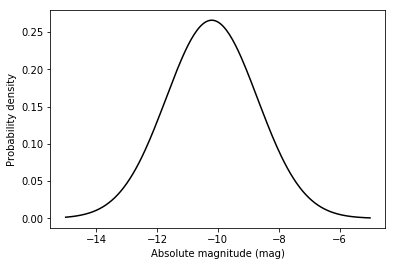

In [32]:
%matplotlib inline

import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

model_mean = -10.2
model_std = 1.5

# plot the distribution
x = np.linspace(-15.0, -5.0, 200)
y = st.norm.pdf(x, loc=model_mean, scale=model_std)
plt.plot(x, y, "k-")
plt.xlabel("Absolute magnitude (mag)")
plt.ylabel("Probability density")
plt.show()

### 2.2. Empirical data...

From a survey of Milky Way globular clusters [1], we get the absolute magnitudes for 81 GCs.

Loaded 81 globular cluster absolute magnitudes for the Milky Way


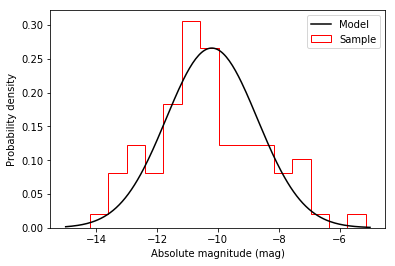

In [33]:
# Load Milky Way globular cluster absolute magnitudes
absolute_MWG = np.loadtxt("GC_MWG_absolute.dat")
N_MWG = len(absolute_MWG)
print("Loaded", N_MWG, "globular cluster absolute magnitudes for the Milky Way")

plt.figure()
plt.plot(x, y, "k-", label="Model")
plt.hist(absolute_MWG, bins=15, histtype="step", color="r", density=True, label="Sample")
plt.xlabel("Absolute magnitude (mag)")
plt.ylabel("Probability density")
plt.legend()
plt.show()

### 2.3. Agreement between model and sample
The model seems to agree with the observations but in science we need to quantify such aggrements. To test it without bias, we forget about the data, and design a hypothesis test. Then we apply the test on the data and report the outcome.

#### Step 1. We define the null hypothesis

> $H_0$: the mean value of the absolute magnitude of the Milky Way GCs is consistent with model

#### Step 2. We decide a significance level

We decide a significance level of $5\%$. This value is commonly used in many scientific disciplines (medicine, psychology, etc.) Therefore,

> $a = 0.05$

This is the lower limit on the probability at which the Type I error is allowed to occur. If the probability is lower, then we reject the null hypothesis.

#### Step 3. The statistic

For $N$ observations $x_i$ the sample mean, $\bar{x}$ is

$$\bar{x} = \sum\limits_{i=1}^{N} x_i$$

For normally distributed observations, $x_i \sim \mathcal{N}(\mu, \sigma)$, it is known that the sample mean is also normally distributed with population mean ($\mu$) and standard deviation equal to the standard deviation of the population ($\sigma$), devided by the square root of the size of the sample ($N$):

$$\bar{x} \sim \mathcal{N}\left(\mu, \frac{\sigma}{\sqrt{N}}\right)$$

This standard deviation is also called *standard error of the mean*:

$${\rm SE} = \frac{\sigma}{\sqrt{N}}$$

Therefore the probability density function (PDF) of the sample mean is:

$$f(\bar{x}) = \frac{1}{\sqrt{2\pi \ \rm SE^2}} \exp\left[-\frac{\left(\bar{x} - \mu\right)^2}{2 \ \rm SE^2}\right]$$

Because of the ability to shift and scale the normal distribution, the quantity

$$ Z = \frac{\bar{x} - \mu}{\rm SE} $$

follows the standard normal distribution (i.e. mean value $0$ and standard deviation $1$):

$$ f(Z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}Z^2}$$

Therefore, by just computing the $Z$ *score* of our sample, $z$, we can easily use tables for the normal distribution or Python code to quickly compute the probability at which $Z$ is below or above a specific value.

We call this value $Z$ *statistic* or *score* and it used whenever the quantity is normally distributed.

#### Step 4. p-value or, critical value for the statistic

Because of the null hypothesis, we must convert the statement "*consistent with...*" to a mathematical statement. In this example, we can consider that the sample mean is inconsistent with the model prediction if its significantly lower or higher. Therefore, the Type I error is equal to probability that the $Z$ score deviates more than the absolute deviation of the score for the sample at hand:

$$ p = P(Z > |z|) + P(Z < -|z|) $$

Using the symmetry of normal distribution's PDF and the fact that $P({\rm A}) + P({\rm not\ A}) = 1$, we arrive at

$$ p = \cdots = 2 \left(1 - P\left(Z < |z|\right)\right) = \cdots = 2 P(Z < -|z|)$$

or simply,

$$ p = 2 \Phi(-|z|) $$

where $\Phi(z)$ is the CDF of the standard normal distirbution.

If we find $p < a = 0.05$ then we reject the null hypothesis.

Alternatively, we can set **critical** values of the $Z$ score that corresponds to the significance level. As rejection should occur either for higher or lower values (two-tail test), we find two critical values, one for each tail, corresponding to $a/2$ probability:

$$ Z_{\rm crit,1} = \Phi^{-1}\left(\frac{a}{2}\right) = -1.96 $$

$$ Z_{\rm crit,2} = \Phi^{-1}\left(1 - \frac{a}{2}\right) = +1.96 $$

Because of the symmetry of the normal distribution we could also compute a critical value for the absolute $Z$ score: *how many **sigmas** away the measured value can be from the model prediction*:

$$ |Z|_{\rm crit} = 1.96 $$


#### Step 5. Decision

Now that we defined all the steps, we can apply it on the data. In the following code, we plot the sample, compute the statistic and print the outcome based on the critical value! Alternatively we could use the $p$-value, which we print anyway.

In [34]:
alpha = 0.05
z_critical = abs(st.norm.ppf(alpha / 2.0))
print("Z critical     : {:.3f}".format(z_critical))
print()

sample_mean = np.mean(absolute_MWG)
standard_error = model_std / (N_MWG ** 0.5)
z_score = (sample_mean - model_mean) / standard_error
print("Sample mean    : {:.3f}".format(sample_mean))
print("Standard error : {:.3f}".format(standard_error))
print("Sample Z score : {:.3f}".format(z_score))

pvalue = 2 * st.norm.cdf(-abs(z_score))
print("p-value        : {:.3g}".format(pvalue))
print()

if abs(z_score) > abs(z_critical):
    print("We reject the null hypothesis.")
else:
    print("We cannot reject the null hypothesis.")

Z critical     : 1.960

Sample mean    : -10.324
Standard error : 0.167
Sample Z score : -0.742
p-value        : 0.458

We cannot reject the null hypothesis.


### 2.4. Questions

1. What is the difference between $Z$ and $t$-statistic?
2. What if the underlying distribution was not Gaussian? What would be the distribution of the sample mean?


# 3. Common hypothesis tests on population parameters
During the last three centuries, scientists performed numerous statistical tests. A few of them are encountered very often because they try to answer simple questions on data following known distributions. Others, are generic, parametric-free and therefore, applicable in many circumstances.

## 3.1. Student's $t$-test

> Is the mean value of a sample equal to the population mean (without knowing the population standard deviation)?

What if the population standard deviation is unknown? In this case, the standard deviation of the sample mean is estimated from the data. Though, the sample mean distribution now follows the Student's $t$-distribution (after applying a shift and a rescale)

Specifically, the statistic is

$$ t = \frac{\bar{x} - \mu}{s / \sqrt{n}} $$

which is similar to the $Z$ statistic except for the substitution of the population std. dev. $\sigma$ with the sample standard deviation $s$.

$t$-distribution is similar to the Gaussian but has 'heavier' tails when the sample size is small ($n$):

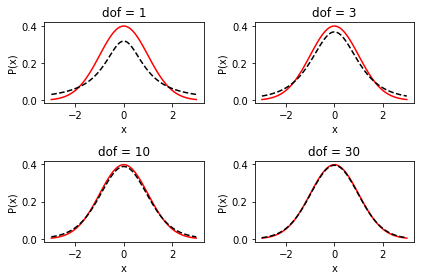

In [65]:
x = np.linspace(-3, 3, 100)                 # x-axis values...
pdf_normal = st.norm.pdf(x)                 # ...and the standard normal PDF at those

degrees_of_freedom = [1, 3, 10, 30]         # four degrees of freedom to plot

plt.figure()
for subplot_index, dof in enumerate(degrees_of_freedom):
    pdf_student = st.t.pdf(x, dof)          # Student's t-distribution PDF (for this dof)

    plt.subplot(2, 2, subplot_index + 1)
    plt.title("dof = {}".format(dof))
    plt.plot(x, pdf_normal, "r-", label="Normal")
    plt.plot(x, pdf_student, "k--", label="Student's t")
    plt.xlabel("x")
    plt.ylabel("P(x)")
    
plt.tight_layout()
plt.show()

If the globular cluster model we dicussed above didn't provide an estimate on the population standard deviation ($\sigma$) of the absolute magnitudes, then we would test whether the mean value in our data is consistent with the prediction of $-10.2\ \rm mag$ using the t-test.

In [66]:
statistic, pvalue = st.ttest_1samp(absolute_MWG, model_mean)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = -0.617
p-value   = 0.539


## 3.2. Two-sample $t$-test

> Do indpendent samples $A$ and $B$ have the same expected value?

The function `ttest_1samp` that we used in the previous example, performs the *one sample* $t$-test, meaning that we test whether the mean of one sample is consistent with a specific value.

In the case we want to test whether two samples' means are consistent, we may use the *two sample* $t$-test which is provided by `scipy.stats` function `ttest_ind` computes the standard 2-sample t-test. Though it **assumes** that the variance of the two populations is equal. If not, then we use the argument `equal_var`: if set to `False` then the Welch's t-test is used.

Imagine the case where the Milky Way GC data was collected by two independent surveys producing two samples A and B. In the cell below, we simulate this scenario by dividing the data randomly into two sets:

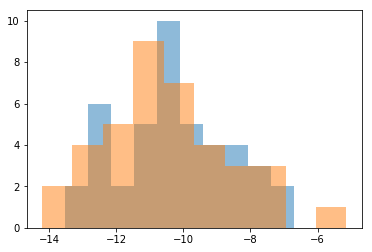

p-value   = 0.777


In [67]:
# split the Milky Way sample randomly into two sets
half = np.random.rand(N_MWG) < 0.5
sample_A = absolute_MWG[half]
sample_B = absolute_MWG[~half]

# show the histograms
plt.figure()
plt.hist(sample_A, bins=10, alpha=0.5)
plt.hist(sample_B, bins=10, alpha=0.5)
plt.show()


equal_variances = True
statistic, pvalue = st.ttest_ind(sample_A, sample_B, equal_var=equal_variances)
print("p-value   = {:.3g}".format(pvalue))

## 3.3. Some distribution tests

### Shapiro-Wilk test for normality

Whether we want to
- verify a model's usage (or derivation) of the normal distribution
- justify the normal distribution assumption in subsequent analysis (e.g. other hypothesis tests)
we can test whether the data follows a normal distribution or not.

The Shapiro-Wilk test can be used in the MW data:

In [69]:
statistic, pvalue = st.shapiro(absolute_MWG)
print("p-value   = {:.3g}".format(pvalue))

p-value   = 0.675


### Kolmogorov-Smirnov test

What if the distribution we want to test is not analytical or there is no statistical test designed for it? In this case, we need a **non-parametric** test. The Kolmogorov-Smirnov (K-S) test is commonly used for such cases and it is based on the idea that if the distributions are significantly different, then their CDFs will deviate and the maximum distance between them can be used to quantify the disagreement:

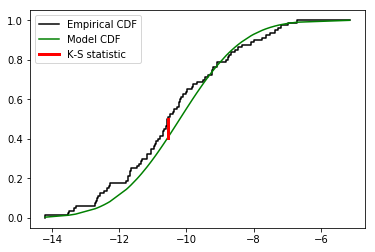

In [70]:
sample = absolute_MWG

# construct the empirical CDF
x_sample = np.sort(sample)
y_sample = np.linspace(0.0, 1.0, len(sample))

# get the theoretical CDF
y_model = st.norm.cdf(x_sample, loc=model_mean, scale=model_std)

# find the index of the point where the distance between the two maximizes (e.g. through absolute or square difference)
index = np.argmax(np.abs(y_sample - y_model))

plt.figure()
plt.step(x_sample, y_sample, "k-", label="Empirical CDF")
plt.plot(x_sample, y_model, "g-", label="Model CDF")
plt.plot([x_sample[index], x_sample[index]], [y_sample[index], y_model[index]], "r", lw=3, label="K-S statistic")
plt.legend()
plt.show()

Now, let's use the K-S test...

In [48]:
sample = absolute_MWG
model_distribution = st.norm(loc=model_mean, scale=model_std)
statistic, pvalue = st.kstest(sample, model_distribution.cdf)
print("Statistic = {:.3g}".format(statistic))
print("p-value   = {:.3g}".format(pvalue))

Statistic = 0.1
p-value   = 0.368


## 3.4. Correlation tests

Sometimes we want to test whether two quantities are correlated. This can be used to 
* Confirm a model that predicts that such a correlation exists
* To predict a quantity ('y' from 'x')
* Data exploration (inspire new theories, find biases)!

For example, does the mass of the central black hole in a galaxy correlate with its host's total mass (e.g. [2])?

### Pearson correlation test

The Pearson correlation coefficient measures the **linear** relationship between two datasets. 

Assumptions:
* the two datasets are normally distributed
* there is a linear relationship between the two datasets
* homoscedasticity: the data points are equally distributed around the regression line

The correlation coefficient varies between -1 (exact anticorrelation) and +1 (exact correlation) with 0 implying no correlation. The $p$-value indicates the *probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme as the one computed from these datasets.*

$$r=\frac{\sum_{i=1}^n(x_i-\overline{x})(y_i-\overline{y})}{\sqrt{\sum_{i=1}^n(x_i-\overline{x})^2}\sqrt{\sum_{i=1}^n(y_i-\overline{y})^2}}$$

> **+** It is widely used and simple to implement.

> **-** Easily skewed by outliers

### Spearman correlation test

The Spearman correlation is a **non-parametric** measure of the monotonicity of the relationship between two datasets. Unlike the Pearson correlation, the Spearman correlation **does not assume** that both datasets are normally distributed. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship.

$$\rho=1 - \frac{6\sum d_i^2}{n\left(n^2 - 1\right)} $$

where $d_i$ is the difference between ranks of the corresponding variables: ${\rm Rank}(x_i) - {\rm Rank}(y_i)$.

The null hypothesis is that $\rho = 0$ - no correlation between the two data sets. One way to test this, which is used by `scipy.stats.spearmanr` is the approximation that the quantity

$$t = \rho \sqrt{\frac{n - 2}{1 - r^2}}$$

is distributed as the Student's $t$-distribution with $n - 2$ degrees of freedom.

> **+** Not very sensitive to outliers.

> **+** Linear dependence not required: works for any monotonic function.

### Kendall rank correlation coefficient

Like the Spearman correlation test, the Kendall rank correlation coefficient is a statistic used to measure the ordinal association between two measured quantities. It determines whether two variables are independent.

For $n$ points $(x_i, y_i)$ there are $n(n-1)$ pairs. A pair is **concordant** if
* for $x_i < x_j$ it is also $y_i < y_j$, or
* for $x_i > x_j$ it is also $y_i > y_j$

else it is **disconcordant**.

The statistic $\tau$ is defined by the difference of the number of concordant pairs, $n_c$, and disconcordant pairs, $n_d$, over their total number:

$$\tau = \frac{n_c-n_d}{n(n-1)/2}$$

so it can takes values from $-1$ to $1$ corresponding to monotonically decreasing and increasing relationship.

The usual hypothesis test aims at determining whether the two datasets are independent, or equivalently $\tau = 0$. The distribution of $\tau$ under the null hypothesis depends on the sample size and for large sample size it can be approximated by a Gaussian with mean value $0$ and standard deviation

$$\frac{4n + 10}{9 n (n-1)}$$

From this distribution we can determine the $p$-value of a calculated $\tau$.

> **+** Not very sensitive to outliers.

> **+** Linear dependence not required: works for any monotonic function.

#### 3.4.4. Example: finding correlations in a catalogue of galaxies

We use the data from [3] that provides a catalogue of 719 galaxies with properties such as position, luminosity in X-rays and other bands, AGN content, etc.

We will try to investigate the dependence between a few properties of the galaxies. For convenience we saved the columns in two `csv` files. In each file we include only the galaxies for which the relevant properties are defined (no `NaN` values).

##### File `halx.csv` 
Two columns: the decimal logarithms of H$\alpha$ and X-ray luminosity (in erg/s) of the galaxies in their sample (where known).

##### File `raha.csv`
The first column in the file is the right ascension of the galaxies (in degrees). The second is again the $\log {\rm H}\alpha$.

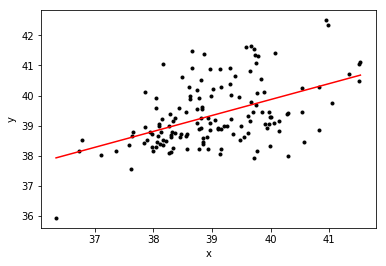

PEARSON  : r =     0.49  |  p-value = 5.05e-10
SPEARMAN : r =    0.451  |  p-value = 1.61e-08
KENDALL  : t =    0.317  |  p-value = 2.19e-08


In [52]:
path = "halx.csv"
#path = "raha.csv"

x, y = np.loadtxt(path, skiprows=1, delimiter=",", unpack=True)

# fit a line
a, b = np.polyfit(x, y, 1)
x_line = np.array([min(x), max(x)])
y_line = a * x_line + b


plt.figure()
plt.plot(x, y, "k.")
plt.plot(x_line, y_line, "r-")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

r, pvalue = st.pearsonr(x, y)
print("PEARSON  : r = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

r, pvalue = st.spearmanr(x, y)
print("SPEARMAN : r = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

r, pvalue = st.kendalltau(x, y)
print("KENDALL  : t = {:8.3g}  |  p-value = {:8.3g}".format(r, pvalue))

## Questions
* Do the three methods *agree* in the case of $\rm RA$ and $\log{\rm H}\alpha$?
* Why is that?
* Should we expect to see a correlation?

### References

1. Nantais et al. (2006). Nearby Spiral Globular Cluster Systems. I. Luminosity Functions. The Astronomical Journal, 131.

2. Magorrian et al. (1998). The Demography of Massive Dark Objects in Galaxy Centers. The Astronomical Journal 115, 2285.

3. She et al. (2017). Chandra Survey of Nearby Galaxies: A Significant Population of Candidate Central Black Holes in Late-type Galaxies. The Astrophysical Journal 842, 131.